<h1><div class="alert alert-block alert-info">
Gradient Descent
</div></h1>

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

<i>Source: </i> https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

The followig picture illustrates that choosing an appropriate learning rate is important:
<img src = "https://i.stack.imgur.com/VxQgz.png">
<i>Source:</i>https://datascience.stackexchange.com/questions/50948/gradient-descent

<h2>Gradient algorithm with fixed step</h2>

The gradient with symbol $\nabla$, is the vector of 1st-order partial derivatives of a
single multi-variable equation:

$u_{k+1} = u_k − ρ\nabla J(u_k)$

Here, we have the following:

$\nabla J$ is the gradient of the cost function, that is the vector of 1st-order partial derivatives of multi-variable equation. Can be also defined as: $\frac{2}{m} X^T(X\beta -y)$

$ρ$ is the parameter used to increment the steps, $0 < ρ < \frac {2α}{M^2}$

$u$ is the vector being analysed

<i>Source: </i> Optimization - Didier Auroux

In [3]:
def beale(x):
    return np.square(1.5 - x[0] + x[0]*x[1]) + np.square(2.25 - x[0] + x[0]*x[1]**2) + np.square(2.625 - x[0] +x[0]*x[1]**3)

def derivative_beale(x):
    dx = 2*x[0]*(x[1]**6 + x[1]**4 - 2*x[1]**3 - x[1]**2 - 2*x[1] + 3) + 5.25*x[1]**3 + 4.5*x[1]**2 + 3*x[1] - 12.75
    dy = 6*x[0]*(x[0]*(x[1]**5 + 2/3*x[1]**3 - x[1]**2 - 1/3*x[1] - 1/3)+2.625*x[1]**2 + 1.5*x[1] + .5)
    res =np.array([dx,dy])
    return res

In [25]:
def gradient_descent(func_, deriv_, features, start_point=None, ephocs=10000, step = .01):
    
    if start_point is None:
        uk = np.random.randn(features)
    else:
        uk = start_point
        
    status = "Didn't reache critical point, try changing the parameters!"
    
    for i in range(ephocs):
            
        dx = deriv_(uk)
        uk_next = np.copy(uk) - step*dx
        
        if (np.all(uk == uk_next)):
            status = "Reached critical point"
            break
            
        uk = np.copy(uk_next)
        
        
    parameters = {"Point reached: ": uk,
                  "Cost function at point: ": func_(uk),
                  "# of iterations: ": i,
                 "Status: ": status}
        
    return parameters

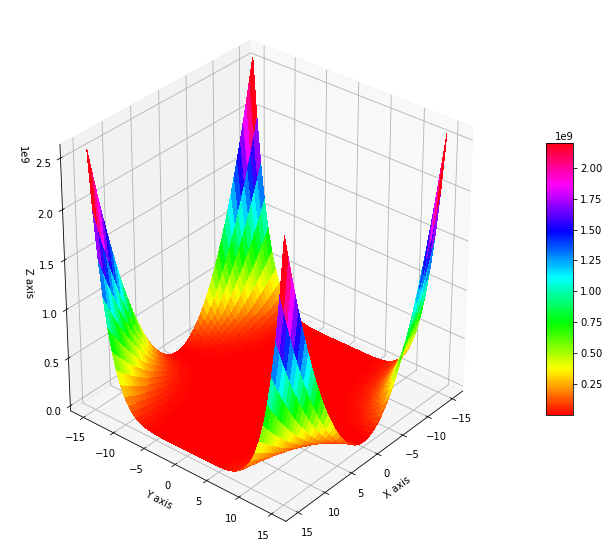

In [26]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# set up the axes for the plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
x = np.linspace(-15, 15, endpoint=True, num=50)
y = np.linspace(-15, 15, endpoint=True, num=50)
x, y = np.meshgrid(x, y)
z = beale([x,y])
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.hsv,
                       linewidth=0, antialiased=False)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.view_init(30, 40)

fig.colorbar(surf, shrink=0.5, aspect=10)
fig.set_size_inches(25, 10)

In [27]:
gradient_descent(beale,derivative_beale,features=2)

{'Point reached: ': array([3. , 0.5]),
 'Cost function at point: ': 9.31348906226557e-28,
 '# of iterations: ': 9652,
 'Status: ': 'Reached critical point'}

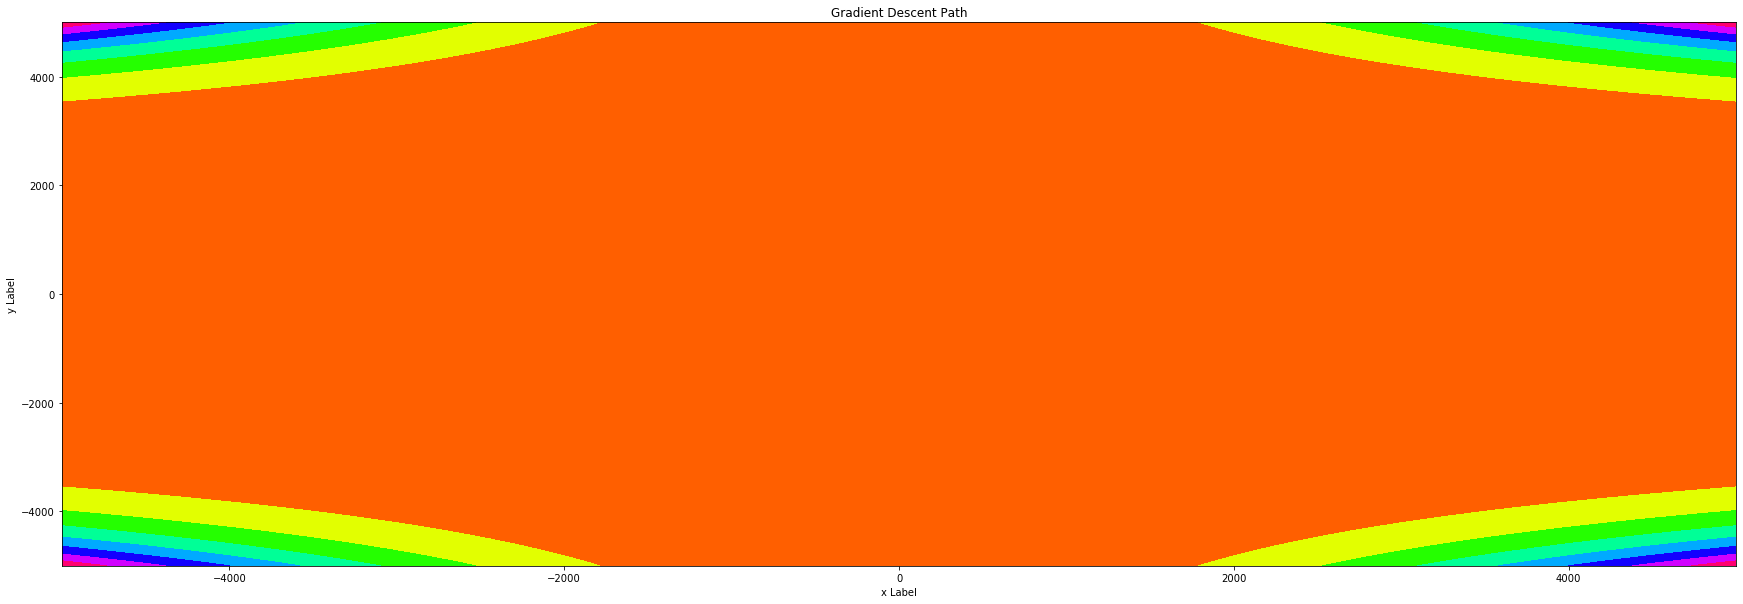

In [7]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# set up the axes for the plot
ax = fig.add_subplot(111)

# plot a 3D surface like in the example mplot3d/surface3d_demo
x = np.linspace(-5000, 5000, endpoint=True, num=1000)
y = np.linspace(-5000, 5000, endpoint=True, num=1000)
x, y = np.meshgrid(x, y)
z = beale([x,y])

cset = ax.contourf(x, y, z, cmap=cm.hsv)

#ax = fig.add_subplot(111)

#ax.scatter(path[0][0],path[0][1], marker = 'D', color = 'white')

#ax.scatter(path[len(path)-1][0],path[len(path)-1][1], marker = 'D', color = 'white')

plt.title("Gradient Descent Path")
ax.set_xlabel('x Label')
ax.set_ylabel('y Label')

fig.set_size_inches(30, 10)

#plt.text(start_point[0], start_point[1],' u0 - Start Point', fontsize=20, color ='white', fontstyle='oblique')
#plt.text(path[len(path)-1][0],path[len(path)-1][1],' uk - Solution', fontsize=20, color ='white', fontstyle='oblique')

plt.show()

<font color = 'orange'><h3><b>Scenario II: </b>Function with a global minimum and local minimum</h3></font>

For simplicity we are going to choose a function considering only one small interval to show one limitation of gradient descent

In [28]:
def local_global_function(x):
    return 2+ np.sin(x) + np.sin(2*x-.5)/2

def derivative_local_global_function(x):
    return np.cos(x) + np.cos(2*x-.5)

In [29]:
x = np.linspace(0, 6, endpoint=True, num=100)
y = local_global_function(x)

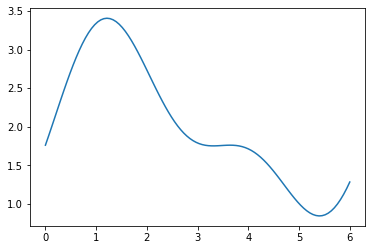

In [30]:
plt.plot(x,y)

In [31]:
gradient_descent(local_global_function,derivative_local_global_function, features=1, start_point =2)

{'Point reached: ': array(3.30825932),
 'Cost function at point: ': 1.7511558009598773,
 '# of iterations: ': 5903,
 'Status: ': 'Reached critical point'}

 ⚠️ <font color='red'> Gradient descent stops evolving when it finds a critical point, so we can get stuck at a local minima. </font>

<h2>Gradient Descent with optimal step</h2>


With certain assumptions on the function $F$ (for example, $F$ convex and $\nabla F$ Lipschitz) and particular choices of $\gamma $  (e.g., chosen either via a line search that satisfies the Wolfe conditions, or the Barzilai–Borwein method[2][3] shown as following),

${\displaystyle \gamma _{n}={\frac {\left|\left(\mathbf {x} _{n}-\mathbf {x} _{n-1}\right)^{T}\left[\nabla F(\mathbf {x} _{n})-\nabla F(\mathbf {x} _{n-1})\right]\right|}{\left\|\nabla F(\mathbf {x} _{n})-\nabla F(\mathbf {x} _{n-1})\right\|^{2}}}}$

<i>Source: </i> Wikipedia

In [23]:
def gradient_descent_optimal_step(func_, deriv_, features, start_point=None, ephocs=1000):
    
    'pk is the size of the step'
    
    if start_point == None:
        uk = np.random.randn(features)
    else:
        uk = start_point
    
    pk = .01
    status = "Didn't reache critical point, try changing the parameters!"
    
    for i in range(ephocs):
                
        dx = deriv_(uk)
        uk_next = np.copy(uk) - pk*dx
        
        if (np.all(uk == uk_next)):
            status = "Reached critical point"
            break
        
        pk = abs(np.dot((uk_next-uk).T, (deriv_(uk_next) - deriv_(uk))))/np.square(np.linalg.norm(deriv_(uk_next) - deriv_(uk)))
                   
        uk = np.copy(uk_next)
        
    
    parameters = {"Point reached: ": uk,
                  "Cost function at point: ": func_(uk),
                  "# of iterations: ": i,
                 "Status: ": status}
        
    return parameters

In [24]:
gradient_descent_optimal_step(beale,derivative_beale,features=2)

{'Critical point: ': array([3. , 0.5]),
 'Cost function at critical point: ': 6.162975822039155e-32,
 '# of iterations: ': 40,
 'Status: ': 'Reached critical point'}

💡 It's impressive how many iterations are saved when using optimal step.

In [32]:
gradient_descent_optimal_step(local_global_function,derivative_local_global_function, start_point = 2, features=1)

{'Critical point: ': array(9.59144463),
 'Cost function at critical point: ': 1.7511558009598773,
 '# of iterations: ': 11,
 'Status: ': 'Reached critical point'}